In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import iqr
import scipy.stats as stats
from scipy.stats import gmean
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from statsmodels.stats.power import TTestIndPower
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline


# 統計学の時間

## ｄｆはtitanicのデータセットを使う

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## カラムの意味
- PassengerId: 乗客の識別ID
- Survived: 生存フラグ（0=死亡、1=生存）
- Pclass: チケットクラス（1=1等、2=2等、3=3等）
- Name: 乗客の名前
- sex: 性別（male=男性、female=女性）
- Age: 年齢
- SibSp: 兄弟姉妹または配偶者の数
- Parch: 両親または子供の数
- Ticket: チケットの番号
- Fare: チケット価格
- Embarked: 出発港（S=サウサンプトン、C=シェルブール、Q=クイーンズタウン）

In [4]:
df = sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# 欠損値の確認
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

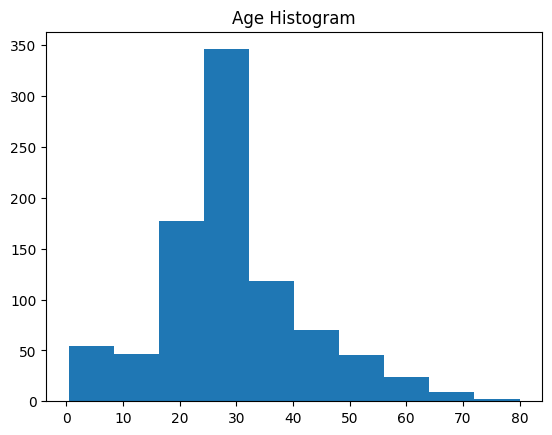

In [6]:
# Ageカラムの欠損値を中央値で埋める
df['age'].fillna(df['age'].median(), inplace=True)

# ヒストグラムをプロット
plt.hist(df['age'])
plt.title('Age Histogram')
plt.show()

## 質的変数をラベルエンコーディングする

In [7]:
# ラベルエンコーダのインスタンスを作成
encoder = LabelEncoder()

# 質的変数をラベルエンコーディング
for col in ['pclass', 'sex', 'embarked', 'class', 'who', 'deck']:
    df[col] = encoder.fit_transform(df[col])

In [8]:
# 質的変数をラベルエンコーディング
for col in ['adult_male', 'embark_town', 'alone']:
    df[col] = encoder.fit_transform(df[col])

In [9]:
# カラムを削除
df = df.drop(['embark_town', 'who', 'adult_male', 'alive'], axis=1)

In [10]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,2,1,22.0,1,0,7.2500,2,2,7,0
1,1,0,0,38.0,1,0,71.2833,0,0,2,0
2,1,2,0,26.0,0,0,7.9250,2,2,7,1
3,1,0,0,35.0,1,0,53.1000,2,0,2,0
4,0,2,1,35.0,0,0,8.0500,2,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,0,13.0000,2,1,7,1
887,1,0,0,19.0,0,0,30.0000,2,0,1,1
888,0,2,0,28.0,1,2,23.4500,2,2,7,0
889,1,0,1,26.0,0,0,30.0000,0,0,2,1


## 質的変数変数の集計
- もうラベルエンコーディングしちゃったけど

In [11]:
# 性別の集計。男性が1
df['sex'].value_counts()

sex
1    577
0    314
Name: count, dtype: int64

In [12]:
# Deckも集計
df['deck'].value_counts()

deck
7    688
2     59
1     47
3     33
4     32
0     15
5     13
6      4
Name: count, dtype: int64

## グラフの描写

In [13]:
print(f"中央値: {df['fare'].median()}")
print(f"平均値: {df['fare'].mean()}")

中央値: 14.4542
平均値: 32.204207968574636


<Axes: >

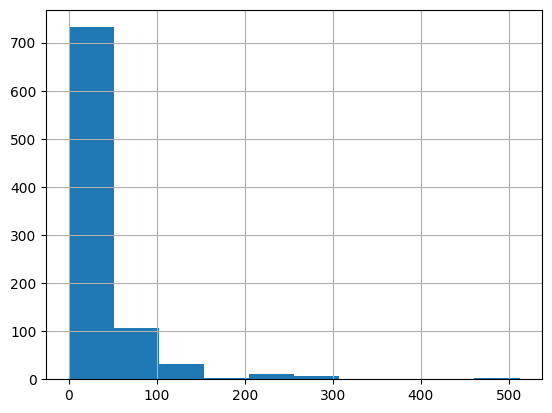

In [14]:
# ヒストグラムを表示します。
df['fare'].hist()

In [15]:
df.groupby("sex")["survived"].mean()

sex
0    0.742038
1    0.188908
Name: survived, dtype: float64

## 度数分布表の作成
- ChatGPTの方が優秀です

In [16]:
# 相対度数の計算、引数をTrueにするだけで分かるなんて
age_counts = df['age'].value_counts()
age_counts

age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [17]:
# 相対度数
age_relative_frequencies = df['age'].value_counts(normalize=True) * 100
age_relative_frequencies

age
28.00    22.671156
24.00     3.367003
22.00     3.030303
18.00     2.918070
19.00     2.805836
           ...    
36.50     0.112233
55.50     0.112233
0.92      0.112233
23.50     0.112233
74.00     0.112233
Name: proportion, Length: 88, dtype: float64

## カラムの意味
- PassengerId: 乗客の識別ID
- Survived: 生存フラグ（0=死亡、1=生存）
- Pclass: チケットクラス（1=1等、2=2等、3=3等）
- Name: 乗客の名前
- Sex: 性別（male=男性、female=女性）
- Age: 年齢
- SibSp: 兄弟姉妹または配偶者の数
- Parch: 両親または子供の数
- Ticket: チケットの番号
- Fare: チケット価格
- Embarked: 出発港（S=サウサンプトン、C=シェルブール、Q=クイーンズタウン）

<Axes: >

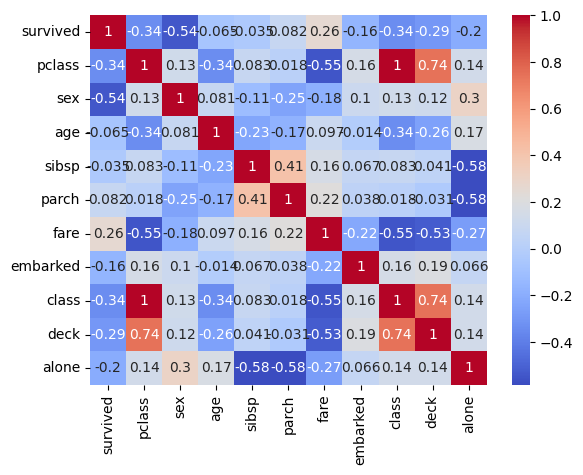

In [18]:
# ヒートマップで相関関係をみてみる
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [19]:
# 累積相対度数
# 相対度数を降順にソートし、累積相対度数を計算する
age_relative_frequencies_sorted = age_relative_frequencies.sort_index(ascending=False)
cumulative_relative_frequencies = age_relative_frequencies_sorted.cumsum()

# 結果を表示する
result_df = pd.DataFrame({
    '年齢': age_relative_frequencies_sorted.index,
    '相対度数': age_relative_frequencies_sorted.values,
    '累積相対度数': cumulative_relative_frequencies.values
})

print(result_df)

       年齢      相対度数      累積相対度数
0   80.00  0.112233    0.112233
1   74.00  0.112233    0.224467
2   71.00  0.224467    0.448934
3   70.50  0.112233    0.561167
4   70.00  0.224467    0.785634
..    ...       ...         ...
83   0.92  0.112233   99.326599
84   0.83  0.224467   99.551066
85   0.75  0.224467   99.775533
86   0.67  0.112233   99.887767
87   0.42  0.112233  100.000000

[88 rows x 3 columns]


In [20]:
# 階級値を求める
# 年齢の階級を定義する
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 階級値を計算する
age_midpoints = [(age_bins[i] + age_bins[i+1]) / 2 for i in range(len(age_bins)-1)]

# 結果を表示する
result_df = pd.DataFrame({
    '階級（年齢）': age_bins[:-1],  # 最後の要素は除外
    '階級値（年齢）': age_midpoints
})

print(result_df)

   階級（年齢）  階級値（年齢）
0       0      5.0
1      10     15.0
2      20     25.0
3      30     35.0
4      40     45.0
5      50     55.0
6      60     65.0
7      70     75.0
8      80     85.0
9      90     95.0


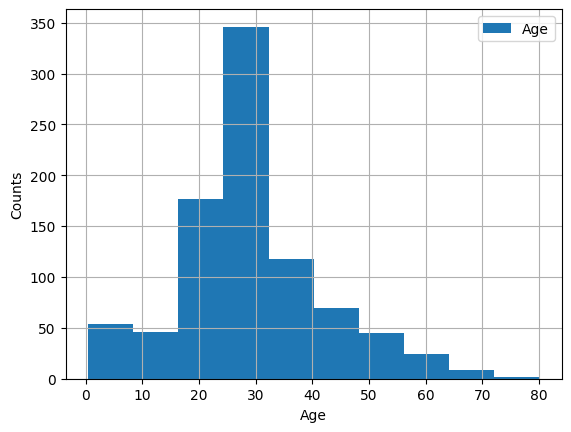

In [21]:
# ヒストグラムを作成
df['age'].hist()

# x軸とy軸に名前を付ける
plt.xlabel('Age')
plt.ylabel('Counts')

# 凡例を追加
plt.legend(['Age'])

# グラフを表示
plt.show()

In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,2,1,22.0,1,0,7.2500,2,2,7,0
1,1,0,0,38.0,1,0,71.2833,0,0,2,0
2,1,2,0,26.0,0,0,7.9250,2,2,7,1
3,1,0,0,35.0,1,0,53.1000,2,0,2,0
4,0,2,1,35.0,0,0,8.0500,2,2,7,1


In [26]:
# 性別とPclass（クラス）を使ってクロス集計する
cross_table = pd.crosstab([df['sex'], df['pclass']], df['survived'], margins=True, margins_name='total')
cross_table


survived        0    1  total
sex   pclass                 
0     0         3   91     94
      1         6   70     76
      2        72   72    144
1     0        77   45    122
      1        91   17    108
      2       300   47    347
total         549  342    891

In [27]:
# 男性と女性の生存者数をそれぞれ取得
male_survivors = df[df['sex'] == 0]['survived'].sum()
female_survivors = df[df['sex'] == 1]['survived'].sum()

# 結果を表示
print(f"男性の生存者数: {male_survivors}")
print(f"女性の生存者数: {female_survivors}")

男性の生存者数: 233
女性の生存者数: 109


## モザイク図の作成

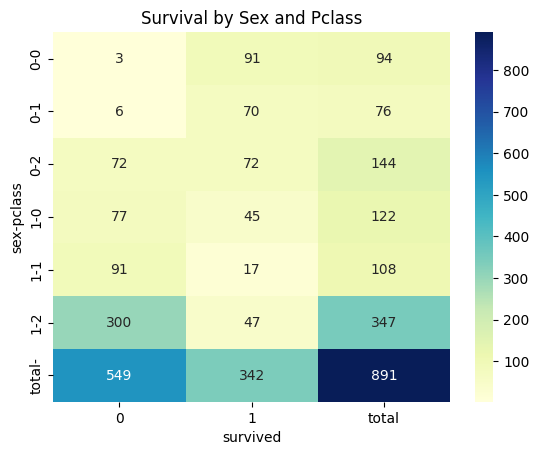

In [28]:
# モザイクプロットの作成
sns.heatmap(cross_table, annot=True, fmt="d", cmap="YlGnBu")

# グラフのタイトルを追加
plt.title("Survival by Sex and Pclass")

# グラフを表示
plt.show()

## 積み上げ棒グラフ

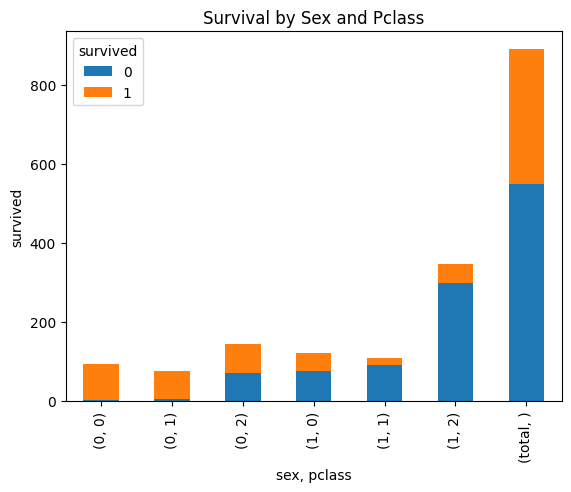

In [29]:
# 積み上げ棒グラフを作成
cross_table.drop('total', axis=1).plot(kind='bar', stacked=True)

# グラフのタイトルと軸ラベルを追加
plt.title('Survival by Sex and Pclass')
plt.xlabel('sex, pclass')
plt.ylabel('survived')

# 凡例を追加
plt.legend(title='survived')

# グラフを表示
plt.show()

## サンプルで時系列のデータセットを作成して積み上げ棒グラフで表現

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-pack

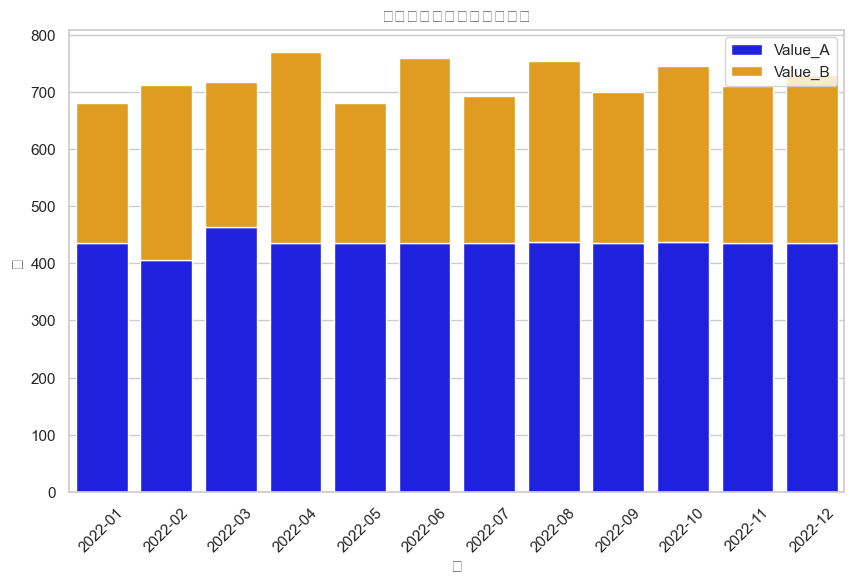

In [36]:
# ダミーの時系列データを作成
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
date_list = [start_date + timedelta(days=x) for x in range((end_date-start_date).days)]
data = pd.DataFrame({'Date': date_list,
                     'Value_A': [i % 30 for i in range(len(date_list))],
                     'Value_B': [i % 20 for i in range(len(date_list))]})


# 日付を月単位に変換
data['Month'] = data['Date'].dt.to_period('M')

# 月ごとに集計
monthly_data = data.groupby('Month').agg({'Value_A': 'sum', 'Value_B': 'sum'})

# 積み上げ棒グラフを描画
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(data=monthly_data, x=monthly_data.index, y='Value_A', color='blue', label='Value_A')
sns.barplot(data=monthly_data, x=monthly_data.index, y='Value_B', color='orange', label='Value_B', bottom=monthly_data['Value_A'])

plt.title('月ごとの積み上げ棒グラフ')
plt.xlabel('月')
plt.ylabel('値')
plt.xticks(rotation=45)
plt.legend()

plt.show()


## 東京の気象情報の時系列データセットを利用
- 平均雲量、
- 平均風速、
- 平均気温、
- 最大気温、
- 最低気温、
- 平均降水量

In [37]:
tokyo_df = pd.read_csv("https://raw.githubusercontent.com/aweglteo/tokyo_weather_data/main/data.csv", parse_dates=True, index_col=0)
tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain
2018-05-17,9.0,3.7,24.0,28.4,21.4,0.0
2018-05-18,7.8,3.0,23.4,27.1,20.0,0.0
2018-05-19,7.5,3.9,21.5,26.3,15.3,0.0
2018-05-20,4.3,3.5,16.8,22.1,13.1,0.0
2018-05-21,10.0,2.4,20.3,27.2,13.7,0.0
...,...,...,...,...,...,...
2023-05-13,10.0,3.0,16.7,18.1,15.4,5.0
2023-05-14,10.0,3.6,16.9,21.2,14.3,3.0
2023-05-15,9.8,2.0,16.1,18.1,14.6,15.5
2023-05-16,2.8,2.6,19.9,27.5,13.1,0.0


/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

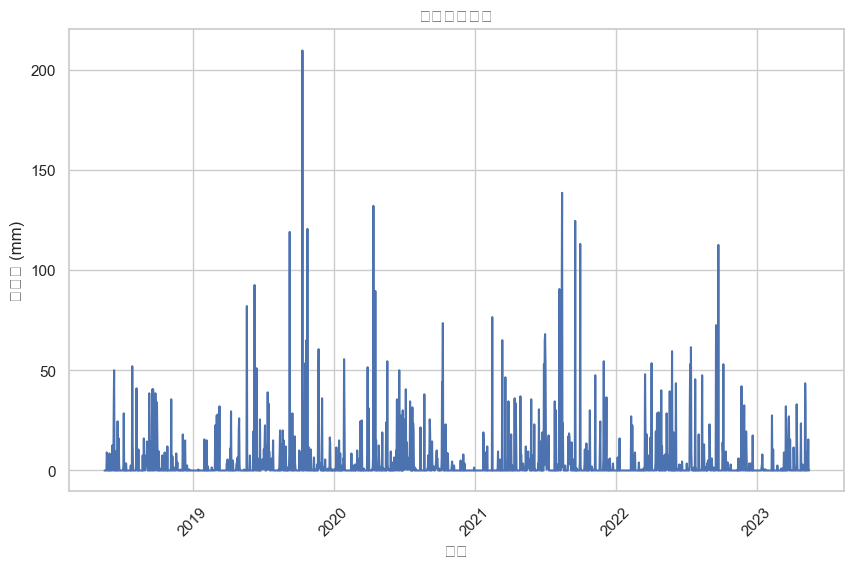

In [39]:
# 折れ線グラフを描画
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.lineplot(x=tokyo_df.index, y=tokyo_df['rain'])

plt.title('東京の降水量')
plt.xlabel('日付')
plt.ylabel('降水量 (mm)')

plt.xticks(rotation=45)
plt.show()

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/s

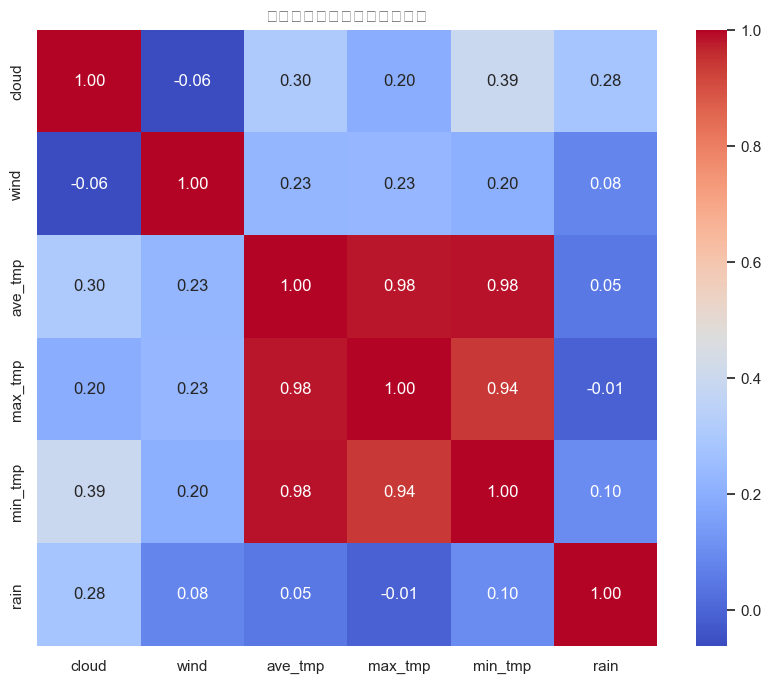

In [40]:
# 共分散を標準化したのが相関関係
tokyo_correlation_matrix = tokyo_df.corr()

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(tokyo_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('東京の気象データの相関関係')
plt.show()

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

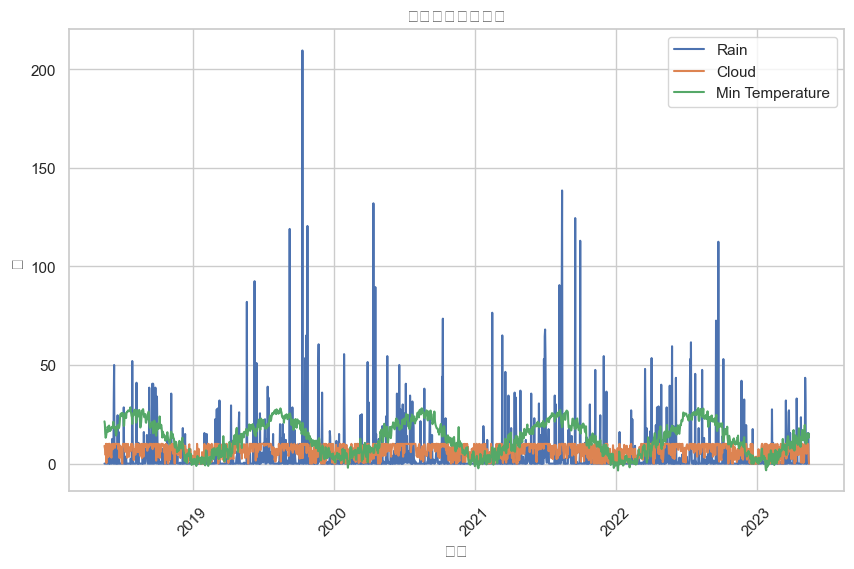

In [41]:
# 折れ線グラフを描画
plt.figure(figsize=(10, 6))

# rainカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['rain'], label='Rain')

# cloudカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['cloud'], label='Cloud')

# min_tmpカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['min_tmp'], label='Min Temperature')

plt.title('東京の気象データ')
plt.xlabel('日付')
plt.ylabel('値')

plt.xticks(rotation=45)
plt.legend()
plt.show()

## 時系列データセットのフィルタリング

In [48]:
# 特定の日数だけのデータを抽出する
start_date = pd.to_datetime('2019-09-01')
end_date = pd.to_datetime('2020-11-10')

filtered_tokyo_df = tokyo_df[(tokyo_df.index >= start_date) & (tokyo_df.index <= end_date)]
filtered_tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0
...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0


/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

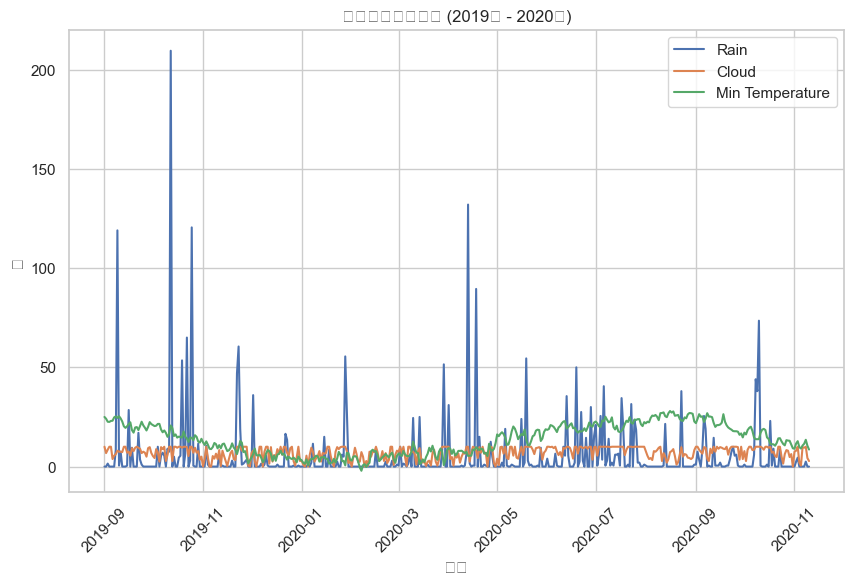

In [49]:
# 折れ線グラフを描画
plt.figure(figsize=(10, 6))

# rainカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, filtered_tokyo_df['rain'], label='Rain')

# cloudカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, filtered_tokyo_df['cloud'], label='Cloud')

# min_tmpカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, filtered_tokyo_df['min_tmp'], label='Min Temperature')

plt.title('東京の気象データ (2019年 - 2020年)')
plt.xlabel('日付')
plt.ylabel('値')

plt.xticks(rotation=45)
plt.legend()
plt.show()

## 標準化

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

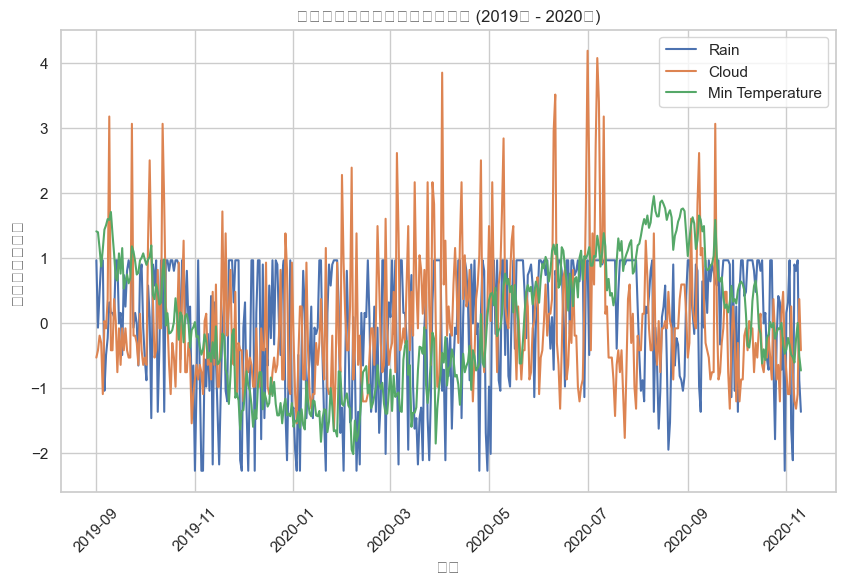

In [51]:
# データを標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_tokyo_df)

# 折れ線グラフを描画
plt.figure(figsize=(10, 6))

# rainカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, scaled_data[:, 0], label='Rain')

# cloudカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, scaled_data[:, 1], label='Cloud')

# min_tmpカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, scaled_data[:, 2], label='Min Temperature')

plt.title('標準化された東京の気象データ (2019年 - 2020年)')
plt.xlabel('日付')
plt.ylabel('標準化された値')

plt.xticks(rotation=45)
plt.legend()
plt.show()


## 時系列データセットの差をみる

In [54]:
filtered_tokyo_df['max_tmp']

2019-09-01    32.1
2019-09-02    31.8
2019-09-03    28.5
2019-09-04    26.5
2019-09-05    29.6
              ... 
2020-11-06    16.2
2020-11-07    20.6
2020-11-08    22.4
2020-11-09    18.3
2020-11-10    16.9
Name: max_tmp, Length: 437, dtype: float64

In [62]:
# 前日との気温差のカラムを作成
filtered_tokyo_df['max_tmp_difference'] = filtered_tokyo_df['max_tmp'].shift(-1) - filtered_tokyo_df['max_tmp']

# 特定の列の欠損値を含む列名が 'column_name' と仮定
mean_value = filtered_tokyo_df['max_tmp_difference'].mean()
filtered_tokyo_df['max_tmp_difference'].fillna(mean_value, inplace=True)

filtered_tokyo_df

/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_5691/2568499695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tokyo_df['max_tmp_difference'] = filtered_tokyo_df['max_tmp'].shift(-1) - filtered_tokyo_df['max_tmp']
/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_5691/2568499695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tokyo_df['max_tmp_difference'].fillna(mean_value, inplace=True)


,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,tmp_difference,max_tmp_difference
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0,-0.300000,-0.300000
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0,-3.300000,-3.300000
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5,-2.000000,-2.000000
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0,3.100000,3.100000
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0,3.300000,3.300000
...,...,...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0,4.400000,4.400000
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0,1.800000,1.800000
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5,-4.100000,-4.100000
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0,-1.400000,-1.400000


In [63]:
# 欠損値の確認
missing_values = filtered_tokyo_df.isna().sum()

# 各列ごとの欠損値の数を表示
print(missing_values)

cloud                 0
wind                  0
ave_tmp               0
max_tmp               0
min_tmp               0
rain                  0
tmp_difference        0
max_tmp_difference    0
dtype: int64


In [66]:
filtered_tokyo_df = filtered_tokyo_df.drop(columns=['tmp_difference'])
filtered_tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,max_tmp_difference
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0,-0.300000
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0,-3.300000
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5,-2.000000
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0,3.100000
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0,3.300000
...,...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0,4.400000
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0,1.800000
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5,-4.100000
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0,-1.400000


## 時系列データセットの変化率をみる

In [70]:
filtered_tokyo_df['max_tmp'].shift(-1) 

2019-09-01    31.8
2019-09-02    28.5
2019-09-03    26.5
2019-09-04    29.6
2019-09-05    32.9
              ... 
2020-11-06    20.6
2020-11-07    22.4
2020-11-08    18.3
2020-11-09    16.9
2020-11-10     NaN
Name: max_tmp, Length: 437, dtype: float64

In [68]:
# 前日との最高気温の変化率カラムを作成
filtered_tokyo_df['max_temp_change_rate'] = (filtered_tokyo_df['max_tmp'].shift(-1) - filtered_tokyo_df['max_tmp']) / filtered_tokyo_df['max_tmp']
filtered_tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,max_tmp_difference,max_temp_change_rate
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0,-0.300000,-0.009346
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0,-3.300000,-0.103774
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5,-2.000000,-0.070175
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0,3.100000,0.116981
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0,3.300000,0.111486
...,...,...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0,4.400000,0.271605
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0,1.800000,0.087379
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5,-4.100000,-0.183036
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0,-1.400000,-0.076503


<Axes: >

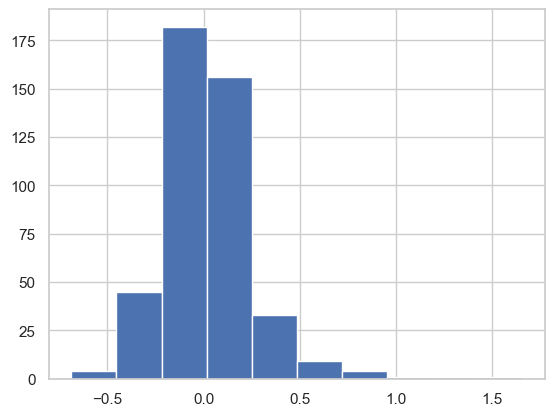

In [71]:
filtered_tokyo_df['max_temp_change_rate'].hist()

In [73]:
# 欠損値を中央値で埋める
mean_value = filtered_tokyo_df['max_temp_change_rate'].mean()
filtered_tokyo_df['max_temp_change_rate'].fillna(mean_value, inplace=True)

filtered_tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,max_tmp_difference,max_temp_change_rate
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0,-0.300000,-0.009346
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0,-3.300000,-0.103774
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5,-2.000000,-0.070175
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0,3.100000,0.116981
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0,3.300000,0.111486
...,...,...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0,4.400000,0.271605
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0,1.800000,0.087379
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5,-4.100000,-0.183036
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0,-1.400000,-0.076503


In [74]:
tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain
2018-05-17,9.0,3.7,24.0,28.4,21.4,0.0
2018-05-18,7.8,3.0,23.4,27.1,20.0,0.0
2018-05-19,7.5,3.9,21.5,26.3,15.3,0.0
2018-05-20,4.3,3.5,16.8,22.1,13.1,0.0
2018-05-21,10.0,2.4,20.3,27.2,13.7,0.0
...,...,...,...,...,...,...
2023-05-13,10.0,3.0,16.7,18.1,15.4,5.0
2023-05-14,10.0,3.6,16.9,21.2,14.3,3.0
2023-05-15,9.8,2.0,16.1,18.1,14.6,15.5
2023-05-16,2.8,2.6,19.9,27.5,13.1,0.0


In [83]:
base_ave_tmp = tokyo_df.loc['2018-05-17', 'ave_tmp']
# ave_tmpの値を2018-05-17の値で割って比率を求める
tokyo_df['ave_tmp_ratio'] = (tokyo_df['ave_tmp'] / base_ave_tmp) * 100
tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,ave_tmp_ratio
2018-05-17,9.0,3.7,24.0,28.4,21.4,0.0,100.000000
2018-05-18,7.8,3.0,23.4,27.1,20.0,0.0,97.500000
2018-05-19,7.5,3.9,21.5,26.3,15.3,0.0,89.583333
2018-05-20,4.3,3.5,16.8,22.1,13.1,0.0,70.000000
2018-05-21,10.0,2.4,20.3,27.2,13.7,0.0,84.583333
...,...,...,...,...,...,...,...
2023-05-13,10.0,3.0,16.7,18.1,15.4,5.0,69.583333
2023-05-14,10.0,3.6,16.9,21.2,14.3,3.0,70.416667
2023-05-15,9.8,2.0,16.1,18.1,14.6,15.5,67.083333
2023-05-16,2.8,2.6,19.9,27.5,13.1,0.0,82.916667


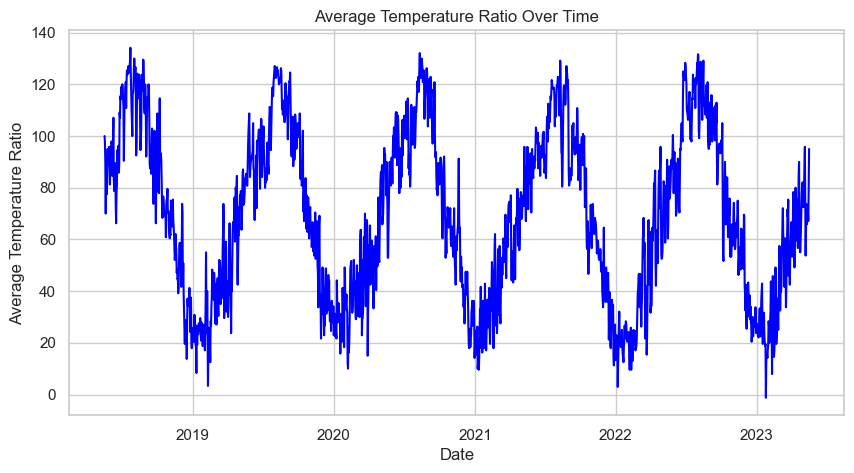

In [85]:
# グラフのスタイルを設定
sns.set_style('whitegrid')

# 'ave_tmp_ratio'の折れ線グラフを描画
plt.figure(figsize=(10, 5))  # グラフのサイズを設定
sns.lineplot(x=tokyo_df.index, y=tokyo_df['ave_tmp_ratio'], color='blue')

# グラフのタイトルと軸ラベルを追加
plt.title('Average Temperature Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature Ratio')

# グラフを表示
plt.show()

## 最頻値を求める

In [86]:
tokyo_df['rain'].mode()

0    0.0
Name: rain, dtype: float64

## 四分位数

In [92]:
# 引数無しだと中央値を返す
tokyo_df['ave_tmp'].quantile([0.25, 0.5, 0.75])

0.25     9.8
0.50    16.6
0.75    22.9
Name: ave_tmp, dtype: float64

In [95]:
# npだとarrayで返す
np.quantile(tokyo_df['ave_tmp'], [0.25, 0.50, 0.75])

array([ 9.8, 16.6, 22.9])

In [97]:
# 四分位範囲を求める(Q3 - Q1)
stats.iqr(tokyo_df['ave_tmp'])

13.099999999999998

## 箱ひげ図

{'whiskers': [<matplotlib.lines.Line2D at 0x159990740>,
 'caps': [<matplotlib.lines.Line2D at 0x1599cdbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1599cc470>],
 'medians': [<matplotlib.lines.Line2D at 0x1599ce5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x159932810>],
 'means': []}

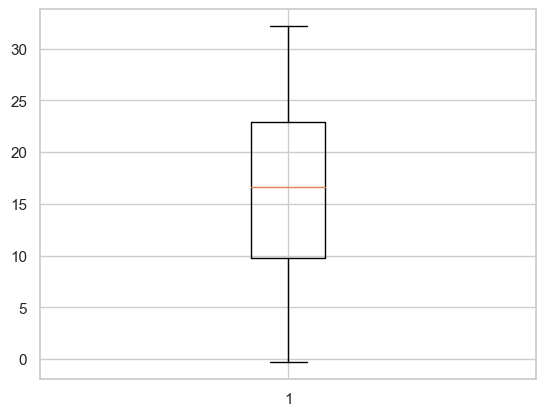

In [98]:
plt.boxplot(tokyo_df['ave_tmp'])


# Python3エンジニア認定模擬試験

In [99]:
import copy

lst1 = [1, [2, 3], 4]
lst2 = list(lst1)
lst3 = copy.deepcopy(lst1)
lst1[1][0] = 'X'

print(lst2[1][0], lst3[1][0])

X 2


In [101]:
from urllib import parse

# クエリ文字列(&)をパースして、それぞれのkey=valueペアをタプルのリストとして返します。
query = 'key1=value1&key1=value2&key2=value3'
print(parse.parse_qsl(query))

[('key1', 'value1'), ('key1', 'value2'), ('key2', 'value3')]


In [103]:
[i*j for i in range(3) for j in range(3)]

[0, 0, 0, 0, 1, 2, 0, 2, 4]

In [104]:
(x for x in range(5) if x % 2 == 0)

<generator object <genexpr> at 0x159a1d4f0>

In [107]:
# 余りを出力する
[x for x in range(5) if x % 2 == 0]

[0, 2, 4]

In [108]:
from functools import wraps

def my_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print('calling decorated function')
        return func(*args, **kwargs)
    return wrapper


@my_decorator
def my_decorated_func():
    """this is my decorated func"""
    print('inside function')
    print(my_decorated_func.__name__)
    print(my_decorated_func.__doc__)

my_decorated_func()

calling decorated function
inside function
my_decorated_func
this is my decorated func


## 解説
- os.removedirsは、指定されたディレクトリを削除し、その親ディレクトリが空であれば再帰的に削除します。
この関数は1つのディレクトリパスしか受け取らず、そのディレクトリが空でなければエラーを返します。
したがって、一つのパスしか受け取らない’os.removedirs(‘/path/to/dir’)’が正しい使い方です。

In [111]:
def attach_custom_dict(**kwargs):
    default_dict = {
        'address': 'tokyo',
    }

    for key, value in kwargs.items():
        default_dict[key] = value
    
    return default_dict

user = { 'name': 'taro', 'age': 20 }
attach_custom_dict(**user)

{'address': 'tokyo', 'name': 'taro', 'age': 20}

In [112]:
[x*2 for x in [i**2 for i in range(4)]]

[0, 2, 8, 18]

## Blackとは不適切なインデントなどを修正してくれるものです

In [113]:
def unpacked_dict():
    a, b = {'a': 1, 'b': 2}

    return a, b
print(unpacked_dict())

('a', 'b')
